In [62]:
import pandas as pd
import string
import re
import random
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, KFold
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import pickle

In [63]:
dataset = pd.read_csv('sentencesplit.csv',names=["ID", "Doc ID", "Sentence", "Sen_ID","Emiten Code","Emiten Name","Label"])
dataset.head(1)

,ID,Doc ID,Sentence,Sen_ID,Emiten Code,Emiten Name,Label
0,1,1,"PT Sri Rejeki Isman Tbk (SRIL), PT SMART Tbk ...",17,SRIL,Sri Rejeki Isman Tbk.,1


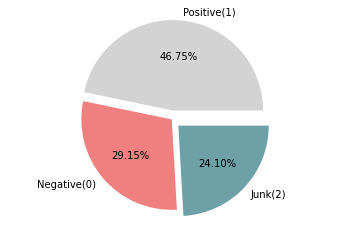

1    2091
2    1304
0    1078
Name: Label, dtype: int64


In [64]:
#visualisasi jumlah data dalam wujud pie chart
labels ='Positive(1)','Negative(0)','Junk(2)'
sizes = dataset['Label'].value_counts()
explode =(0.1,0,0.1)
colors = ['#D3D3D3','#f08080','#6da0a7']

fig1,ax1=plt.subplots()
ax1.pie(sizes,explode=explode,colors=colors,labels=labels,autopct='%.2f%%',
       shadow=False,startangle = 0)
ax1.axis('equal')

plt.show()

print(dataset['Label'].value_counts())

In [65]:
def preprocessing(text):
    text= re.sub('\.tg.+(?=(Sumber))','',text)
    words = word_tokenize(text)
    tokens = [w for w in words if w.lower() not in string.punctuation]
    #stopw = stopwords.words('indonesian')
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    tokens = [stopword.remove(token) for token in tokens]
    
   # tokens = [token for token in tokens if token not in stopw]
    # remove words less than three letters
    tokens = [word for word in tokens if len(word)>=3]
    tokens = [re.sub(r'\b\w{1,3}\b', '', token) for token in tokens]
#     tokens = re.sub(r'\b\w{1,3}\b', '', tokens)
    #remove number
    for i in range (10):
        tokens = [token.replace(str(i),'')for token in tokens]
    #lower capitalization
    tokens = [word.lower() for word in tokens]
    #stemmer
    stemmer = StemmerFactory().create_stemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    # lemmatize
    #lemma = WordNetLemmatizer()
    #tokens = [lemma.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text 

In [66]:
#preprocessign dan 
#df_all = pd.DataFrame(dataset)
#df_filter=df_all[df_all.Label !=2 ]
#df_filter["Sentence"]=df_filter["Sentence"].apply(preprocessing)
#df_filter.to_csv("df_filter.csv", index=None)
#df_filter

#quick load
df_filter=pd.read_csv("df_filter.csv")
df_filter

,ID,Doc ID,Sentence,Sen_ID,Emiten Code,Emiten Name,Label
0,1,1,rejeki isman sril smart smar sekar laut sk...,17,SRIL,Sri Rejeki Isman Tbk.,1
1,2,1,pilih saham smra sril,43,SRIL,Sri Rejeki Isman Tbk.,1
2,3,1,sril milik porsi ekspor tinggi jual justru unt...,45,SRIL,Sri Rejeki Isman Tbk.,1
3,4,2,media nusantara citra mncn anggota indeks kom...,4,MNCN,Media Nusantara Citra Tbk. [S],1
4,8,2,mncn target dapat dana hingga triliun aksi k...,11,MNCN,Media Nusantara Citra Tbk. [S],1
...,...,...,...,...,...,...,...
3164,4469,1674,baca juga ihsg siap lanjut kuat enam hari turu...,12,SMGR,Semen Indonesia (Persero) Tbk. [S],0
3165,4470,1674,indocement tunggal prakasa intp turun,13,INTP,Indocement Tunggal Prakasa Tbk. [S],0
3166,4471,1674,indofood sukses makmur indf turun,14,INDF,Indofood Sukses Makmur Tbk. [S],0
3167,4472,1674,baca juga simak rekomendasi saham eraa tins w...,15,SCMA,Surya Citra Media Tbk.],1


In [68]:
df_train, df_test = train_test_split(df_filter, test_size =0.25,random_state=10)

In [69]:
df_train.head()

,ID,Doc ID,Sentence,Sen_ID,Emiten Code,Emiten Name,Label
2458,3592,1341,reccuring income jadi faktor utama selamat ker...,8,INCO,Vale Indonesia Tbk. [S],1
860,1261,453,bobot saham indf lebih tinggi icbp lama kenal ...,11,ICBP,Indofood CBP Sukses Makmur Tbk. [S],0
1423,2160,748,saham beli bersih besar asing telekomunikasi i...,19,BBCA,Bank Central Asia Tbk.,1
2046,3008,1099,surya citra media scma turun level,19,SCMA,Surya Citra Media Tbk.],0
97,146,39,pada semester - fathia jelas wsbp pasang targe...,11,WSBP,Waskita Beton Precast Tbk.,1


In [70]:
df_test.head()

,ID,Doc ID,Sentence,Sen_ID,Emiten Code,Emiten Name,Label
1449,2189,766,naik tinggi jadi saham bmri turun dalam timpa...,7,BMRI,Bank Mandiri (Persero) Tbk.,1
965,1472,513,saham nasib nahas adro ptba united tractor un...,17,MNCN,Media Nusantara Citra Tbk. [S],1
822,1204,433,saham losers lq jasa marga pesero jsmr turun,15,JSMR,Jasa Marga (Persero) Tbk. [S],0
980,1492,528,saham perban bbca bbri dorong efek pilih presi...,8,BBCA,Bank Central Asia Tbk.,1
1943,2876,1046,saham jual bersih besar asing bank rakyat indo...,23,BBNI,Bank Negara Indonesia (Persero) Tbk.,0


In [71]:
df_1 = df_train[df_train.Label ==1]
df_1.head()

,ID,Doc ID,Sentence,Sen_ID,Emiten Code,Emiten Name,Label
2458,3592,1341,reccuring income jadi faktor utama selamat ker...,8,INCO,Vale Indonesia Tbk. [S],1
1423,2160,748,saham beli bersih besar asing telekomunikasi i...,19,BBCA,Bank Central Asia Tbk.,1
97,146,39,pada semester - fathia jelas wsbp pasang targe...,11,WSBP,Waskita Beton Precast Tbk.,1
761,1093,379,stok tip harga nikel jadi naik bawa sentimen ...,20,INCO,Vale Indonesia Tbk. [S],1
2860,4071,1496,presiden direktur kalbe farma klbf vidjongtiu...,8,KLBF,Kalbe Farma Tbk. [S],1


In [72]:
df_0 = df_train[df_train.Label ==0]
df_0.to_csv("df_0.csv", index=None)
df_0.head()

,ID,Doc ID,Sentence,Sen_ID,Emiten Code,Emiten Name,Label
860,1261,453,bobot saham indf lebih tinggi icbp lama kenal ...,11,ICBP,Indofood CBP Sukses Makmur Tbk. [S],0
2046,3008,1099,surya citra media scma turun level,19,SCMA,Surya Citra Media Tbk.],0
2560,3719,1374,investor asing terus gelar aksi jual saham ban...,4,BBRI,Bank Rakyat Indonesia (Persero) Tbk.,0
1276,1959,684,jakarta meski alami turun jual tipis semester ...,3,INTP,Indocement Tunggal Prakasa Tbk. [S],0
1695,2539,903,ebitda inco bahkan anjlok jadi juta,18,INCO,Vale Indonesia Tbk. [S],0


In [73]:
#undersampling
df_1copy = df_1
random.seed(6666)
randsample = random.sample(range(df_1copy.shape[0]),df_1copy.shape[0]-df_0.shape[0])

df_1copy=df_1copy.reset_index()
for i in randsample:
    df_1copy=df_1copy.drop([i],axis=0)
    
df_1copy=df_1copy.reset_index()

df_1copy.to_csv("df_1copy.csv", index=None)
df_1copy.head()

,level_0,index,ID,Doc ID,Sentence,Sen_ID,Emiten Code,Emiten Name,Label
0,0,2458,3592,1341,reccuring income jadi faktor utama selamat ker...,8,INCO,Vale Indonesia Tbk. [S],1
1,4,2860,4071,1496,presiden direktur kalbe farma klbf vidjongtiu...,8,KLBF,Kalbe Farma Tbk. [S],1
2,7,54,80,15,sementara kondisi zero leverage margin laba be...,22,INTP,Indocement Tunggal Prakasa Tbk. [S],1
3,8,1099,1692,602,posisi tiga saham sampoerna hmsp buku asing ...,14,HMSP,HM Sampoerna Tbk.,1
4,11,352,518,133,adapun tiga saham naik harga elnusa elsa bank...,17,ELSA,Elnusa Tbk. [S],1


In [74]:
#Tf-IDF

vectorizer = CountVectorizer()
doc_vector0 = vectorizer.fit_transform(df_0['Sentence'])
DataFrame0 = pd.DataFrame(doc_vector0.toarray().transpose(), index=vectorizer.get_feature_names())
DataFrame0.head()


,0,1,2,3,4,5,6,7,8,9,...,797,798,799,800,801,802,803,804,805,806
aali,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
acara,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
achmad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
acset,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
acst,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
vectorizer = CountVectorizer()
doc_vector1 = vectorizer.fit_transform(df_1copy['Sentence'])
DataFrame1 = pd.DataFrame(doc_vector1.toarray().transpose(), index=vectorizer.get_feature_names())
DataFrame1.head()

,0,1,2,3,4,5,6,7,8,9,...,797,798,799,800,801,802,803,804,805,806
aali,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
account,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aces,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
achmad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
TF0 = DataFrame0.sum(axis = 1) #TF 0
TF0 = TF0/len(DataFrame0.columns)
TF0.sort_values(ascending = False)

saham     0.784387
miliar    0.447336
turun     0.405204
bank      0.265180
harga     0.256506
            ...   
point     0.001239
holcim    0.001239
polu      0.001239
hita      0.001239
lirik     0.001239
Length: 1318, dtype: float64

In [77]:
TF1 = DataFrame1.sum(axis = 1) #TF 1
TF1 = TF1/len(DataFrame1.columns)
TF1.sort_values(ascending = False)

saham       0.539033
miliar      0.260223
besar       0.198265
bank        0.162330
harga       0.149938
              ...   
tapanuli    0.001239
hmetd       0.001239
tapi        0.001239
tari        0.001239
lindung     0.001239
Length: 1669, dtype: float64

In [78]:
df0 = DataFrame0.gt(0).sum(axis=1).sort_values(ascending=False) #Doc Freq 0
df0

saham      502
turun      303
jual       185
besar      184
harga      181
          ... 
poly         1
poor         1
holding      1
porsi        1
lirik        1
Length: 1318, dtype: int64

In [79]:
df1 = DataFrame1.gt(0).sum(axis=1).sort_values(ascending=False) #Doc Freq 1
df1

saham      353
besar      150
baca       120
juga       120
naik       112
          ... 
situasi      1
skala        1
smart        1
smca         1
lindung      1
Length: 1669, dtype: int64

In [80]:
IDF0=np.log(len(DataFrame0.columns)/DataFrame0.gt(0).sum(axis=1)) #IDF 0
IDF0

aali       6.000176
acara      6.693324
achmad     6.693324
acset      5.307029
acst       5.594711
             ...   
yosua      5.307029
yuherni    6.693324
yulius     6.000176
yuwono     6.693324
zona       4.128374
Length: 1318, dtype: float64

In [81]:
IDF1=np.log(len(DataFrame1.columns)/DataFrame1.gt(0).sum(axis=1)) #IDF 1
IDF1

aali       4.613882
abad       6.693324
account    6.693324
aces       4.901564
achmad     6.693324
             ...   
yosua      5.307029
yudha      6.693324
yuwono     6.693324
zero       6.000176
zona       5.307029
Length: 1669, dtype: float64

In [82]:
TFIDF0 = TF0*IDF0
TFIDF0.sort_values(ascending=False)

miliar       0.786796
bank         0.442702
indonesia    0.409744
turun        0.396935
harga        0.383431
               ...   
point        0.008294
holcim       0.008294
polu         0.008294
hita         0.008294
lirik        0.008294
Length: 1318, dtype: float64

In [83]:
TFIDF1 = TF1*IDF1
TFIDF1.sort_values(ascending=False)

miliar       0.538233
saham        0.445703
bank         0.357886
besar        0.333619
indonesia    0.304201
               ...   
katalis      0.008294
susu         0.008294
susul        0.008294
kapuk        0.008294
lindung      0.008294
Length: 1669, dtype: float64

In [84]:
percentTFIDF1 = TFIDF1.sort_values(ascending = False)
percentTFIDF1 = percentTFIDF1[0:int(1*len(TFIDF1))] #10 % dari TFIDF1 untuk VOCABULARY LIST
percentTFIDF1.to_frame()
Vocab1=percentTFIDF1.index.values.tolist() # Mengambil vocabulary
Vocab1

['miliar',
 'saham',
 'bank',
 'besar',
 'indonesia',
 'harga',
 'naik',
 'tahun',
 'juga',
 'baca',
 'beli',
 'triliun',
 'bersih',
 'jadi',
 'rekomendasi',
 'asing',
 'dapat',
 'indeks',
 'kompas',
 'target',
 'hmsp',
 'anggota',
 'bbri',
 'usaha',
 'kerja',
 'laba',
 'bmri',
 'asi',
 'nilai',
 'catat',
 'tlkm',
 'capai',
 'kali',
 'baru',
 'bbca',
 'adro',
 'semester',
 'jual',
 'wika',
 'lalu',
 'hingga',
 'bisnis',
 'lebih',
 'wsbp',
 'bbni',
 'ptba',
 'ggrm',
 'milik',
 'akumulasi',
 'untr',
 'emiten',
 'karya',
 'sebut',
 'hari',
 'telekomunikasi',
 'proyek',
 'bbtn',
 'investor',
 'sril',
 'juta',
 'bangun',
 'kuat',
 'excl',
 'tumbuh',
 'mandiri',
 'akhir',
 'turun',
 'analis',
 'laku',
 'sementara',
 'tutup',
 'indf',
 'kontrak',
 'kata',
 'mncn',
 'buku',
 'positif',
 'negara',
 'batubara',
 'medc',
 'smgr',
 'adapun',
 'bsde',
 'tingkat',
 'dagang',
 'masing',
 'waskita',
 'adhi',
 'jalan',
 'icbp',
 'sekuritas',
 'kuartal',
 'tengah',
 'dana',
 'inco',
 'meski',
 'ihsg',
 

In [85]:
percentTFIDF0 = TFIDF0.sort_values(ascending = False)
percentTFIDF0 = percentTFIDF0[0:int(1*len(TFIDF0))] #10 % dari TFIDF0 untuk VOCABULARY LIST
percentTFIDF0.to_frame()
Vocab0=percentTFIDF0.index.values.tolist() # Mengambil vocabulary

In [86]:
Corpus1 =df_1copy["Sentence"].str.cat(sep = " ")
Corpus1

'reccuring income jadi faktor utama selamat kerja pwon semester lanjut hingga akhir tahun presiden direktur kalbe farma  klbf vidjongtius nyata pinjam bank sebut butuh bagi alokasi dana sementara kondisi zero leverage margin laba bersih intp lebih stabil tatkala harga semen cenderung rendah posisi tiga saham sampoerna hmsp buku   asing nila  miliar adapun tiga saham naik harga elnusa  elsa bank tabung negara  bbtn waskita beton precast  wsbp bank negara indonesia  bbni gera harga tahan atas garis bawah bollinger lihat pola tweezer bottom candlestick pattern indikasi ada potensi stimulus beli antara asi selesai bangun pltu jawa kapasitas x megawatt jepara rampung tahun  analis samuel sekuritas indonesia suria dharma nilai segmen bisnis makan jalan indofood  sukses makmur  icbp segmen bogasari jadi topang utama kerja indf sebut sisa tahun adapun rasio harga nilai buku  saham pgas  kali dalam proyek wika gedung jadi pimpin porsi skema kerja sama operasi  serta upaya laku inkp diversifikas

In [87]:
Unique0 = DataFrame0.index.values.tolist()
Unique1 = DataFrame1.index.values.tolist()
UniqueWords = Unique0+Unique1
UniqueWords=set(UniqueWords) #menjadikan unik list 1 dan 0

pickle.dump(UniqueWords, open('UniqueWords.sav', 'wb'))
UniqueWords


{'cover',
 'investama',
 'siap',
 'balikpapan',
 'rebound',
 'rilis',
 'asya',
 'jasa',
 'chief',
 'rokok',
 'tekad',
 'benar',
 'upacara',
 'issp',
 'prakarsa',
 'tram',
 'desak',
 'related',
 'ban',
 'begini',
 'delapan',
 'kurniawan',
 'naf',
 'pita',
 'expenditure',
 'capex',
 'swasta',
 'batang',
 'love',
 'indoagri',
 'storage',
 'uji',
 'perdana',
 'untuk',
 'iring',
 'swasembada',
 'tender',
 'infrastruktur',
 'generik',
 'death',
 'kalor',
 'modal',
 'bentuk',
 'perhati',
 'padahal',
 'ladang',
 'jalin',
 'tenor',
 'dire',
 'haris',
 'disney',
 'sambung',
 'surya',
 'pikir',
 'bantu',
 'beban',
 'hanya',
 'pegang',
 'konfirmasi',
 'dunia',
 'berkah',
 'ambil',
 'atawa',
 'hubung',
 'rampung',
 'variabel',
 'alam',
 'mereka',
 'axiata',
 'merinci',
 'ssia',
 'hilang',
 'beda',
 'marga',
 'buruk',
 'wawan',
 'jadwal',
 'laurens',
 'untung',
 'samping',
 'online',
 'seri',
 'adhi',
 'norwegia',
 'danamon',
 'cukup',
 'btps',
 'gudang',
 'notes',
 'pnlf',
 'bersih',
 'estate',
 'a

In [88]:
txt1=Corpus1.split(" ")

txt1 = [x for x in txt1 if x!='']

for index,i in enumerate(txt1):
    if Vocab1.count(i) == 0:
        txt1[index]=""

txt1 = [x for x in txt1 if x!='']
pickle.dump(txt1, open('txt1.sav', 'wb'))
len(txt1)

11389

In [89]:
UniqueWords=list(UniqueWords) #Membuat dictionary = jumlah kata unik

DictUniq = {}
ModelPos = {}

for i in UniqueWords:
    DictUniq[i]=txt1.count(i) #Jumlah kata unik dalam kelas positif
    ModelPos[i]=((txt1.count(i))+1)/((len(txt1))+(len(UniqueWords))) #Model ( Laplace Smoothing )
    
pickle.dump(ModelPos, open('ModelPos.sav', 'wb'))
ModelPos


{'cover': 0.00014848912317172767,
 'investama': 7.424456158586383e-05,
 'siap': 0.0006682010542727745,
 'balikpapan': 0.00014848912317172767,
 'rebound': 0.00014848912317172767,
 'rilis': 0.0005197119311010468,
 'asya': 0.00014848912317172767,
 'jasa': 0.0011879129853738213,
 'chief': 7.424456158586383e-05,
 'rokok': 0.000445467369515183,
 'tekad': 0.00014848912317172767,
 'benar': 0.00014848912317172767,
 'upacara': 0.00014848912317172767,
 'issp': 0.0002227336847575915,
 'prakarsa': 0.0003712228079293192,
 'tram': 0.0002227336847575915,
 'desak': 0.00014848912317172767,
 'related': 7.424456158586383e-05,
 'ban': 0.00014848912317172767,
 'begini': 7.424456158586383e-05,
 'delapan': 7.424456158586383e-05,
 'kurniawan': 0.00029697824634345533,
 'naf': 0.001856114039646596,
 'pita': 7.424456158586383e-05,
 'expenditure': 0.00014848912317172767,
 'capex': 0.0005197119311010468,
 'swasta': 0.00014848912317172767,
 'batang': 0.0002227336847575915,
 'love': 0.00014848912317172767,
 'indoagri

In [90]:
Corpus0 =df_0["Sentence"].str.cat(sep = " ")
txt0=Corpus0.split(" ")
txt0 = [x for x in txt0 if x!='']
txt0 = [x for x in txt0 if x!='-']

for index,i in enumerate(txt0):
    if Vocab0.count(i) == 0:
        txt0[index]=""

txt0 = [x for x in txt0 if x!='']
pickle.dump(txt0, open('txt0.sav', 'wb'))
len(txt0)

11916

In [91]:
UniqueWords=list(UniqueWords) #Membuat dictionary = jumlah kata unik

ModelNeg = {}
UniqNeg = {}
for i in UniqueWords:
    UniqNeg[i] = txt0.count(i)
    ModelNeg[i]=((txt0.count(i))+1)/((len(txt0))+(len(UniqueWords))) #Model ( Laplace Smoothing )

pickle.dump(ModelNeg, open('ModelNeg.sav', 'wb'))

ModelNeg

{'cover': 7.144898542440698e-05,
 'investama': 0.00014289797084881395,
 'siap': 0.00035724492712203485,
 'balikpapan': 7.144898542440698e-05,
 'rebound': 0.0002857959416976279,
 'rilis': 0.0006430408688196628,
 'asya': 7.144898542440698e-05,
 'jasa': 0.0007144898542440697,
 'chief': 0.00014289797084881395,
 'rokok': 0.00014289797084881395,
 'tekad': 7.144898542440698e-05,
 'benar': 7.144898542440698e-05,
 'upacara': 7.144898542440698e-05,
 'issp': 7.144898542440698e-05,
 'prakarsa': 0.0005001428979708488,
 'tram': 0.00014289797084881395,
 'desak': 7.144898542440698e-05,
 'related': 0.00014289797084881395,
 'ban': 7.144898542440698e-05,
 'begini': 0.00035724492712203485,
 'delapan': 0.00021434695627322093,
 'kurniawan': 0.0002857959416976279,
 'naf': 0.00014289797084881395,
 'pita': 0.00014289797084881395,
 'expenditure': 0.00021434695627322093,
 'capex': 0.0005001428979708488,
 'swasta': 0.00014289797084881395,
 'batang': 7.144898542440698e-05,
 'love': 7.144898542440698e-05,
 'indoagr

In [92]:
data='KONTAN.CO.ID - JAKARTA.  Indeks Harga Saham Gabungan ( IHSG ) di Bursa Efek Indonesia (BEI) menghijau, pada perdagangan Kamis (3/7).   Ketika bursa saham tutup lapak, IHSG naik 13,34 poin (0,21%) dari penutupan sebelumnya, lalu hinggap di angka indeks 6.375,97.  LQ45 , indeks saham dengan konstituen saham-saham berkapitalisasi pasar terbesar dan terlikuid, naik 0,20 poin (0,02%) ke 1.020,42.  Indeks  Kompas100  yang beranggotakan seratus saham dengan likuiditas dan kapitalisasi pasar terbesar juga menghijau. Indeks terbitan Kompas ini naik 2,42 poin (0,19%), lalu hinggap di •1.296,07.  Sri Rejeki Isman Tbk ( SRIL ), Adaro Energy Tbk ( ADRO ) ,dan Batubara Bukit Asam Tbk ( PTBA ) berada di posisi tiga pertama daftar saham LQ45 dengan PER positif terkecil secara berurutan; masing-masing 4,36 kali, 6,70 kali, dan 7,72 kali.  Posisi selanjutnya diisi oleh MNCN, UNTR, ITMG, ELSA, BBTN, WSBP, dan MEDC.  Sejalan dengan IHSG yang menghijau, lima dari 10 saham LQ45 dengan PER terendah naik harga dibanding penutupan sebelumnya. Saham-saham bernasib baik itu adalah SRIL, ADRO, PTBA, Media Nusantara Citra Tbk (MNCN), dan Medco Energy (MEDC).  Dua saham turun, yaitu United Tractor Tbk (UNTR) dan Indo Tambangraya Megah Tbk (ITMG).  Adapun tiga saham lain yang naik harga adalah Elnusa Tbk (ELSA), Bank Tabungan Negara Tbk (BBTN), dan Waskita Beton Precast Tbk (WSBP).    .tg {border-collapse:collapse;border-spacing:0;border-color:#aaa;} .tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#aaa;color:#333;background-color:#fff;} .tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#aaa;color:#fff;background-color:#f38630;} .tg .tg-zczf{background-color:#FCFBE3;text-align:right;vertical-align:top} .tg .tg-lqy6{text-align:right;vertical-align:top} .tg .tg-amwm{font-weight:bold;text-align:center;vertical-align:top} .tg .tg-jyax{background-color:#FCFBE3;font-weight:bold;text-align:center;vertical-align:top} .tg .tg-0lax{text-align:left;vertical-align:top} .tg .tg-dg7a{background-color:#FCFBE3;text-align:left;vertical-align:top}    Sumber: RTI   Secara umum ada anggapan bahwa semakin kecil angka PER maka semakin murah pula harga saham tersebut dibanding saham-saham lain dalam sektor usaha yang sama.  Price earning ratio  (PER) adalah perbandingan antara harga saham dengan laba bersih per saham. Penurunan harga saham di bursa secara otomatis akan menurunkan pula nilai PER kalau pada saat yang sama tidak terjadi perubahan laba bersih per saham. '
Testpre=[]
split = sent_tokenize(data)
for i in split:
    Testpre.append(preprocessing(i))

Testpre


['kontan jakarta',
 'indeks harga saham gabung ihsg bursa efek indonesia  hijau dagang kamis ',
 'ketika bursa saham tutup lapak ihsg naik  poin  tutup belum lalu hinggap angka indeks ',
 'lq indeks saham konstituen saham kapital pasar besar likuid naik  poin  ',
 'indeks kompas anggota ratus saham likuiditas kapital pasar besar hijau',
 'indeks terbit kompas naik  poin  lalu hinggap ',
 ' rejeki isman  sril adaro energy  adro batubara bukit asam  ptba ada posisi tiga pertama daftar saham lq  positif kecil rurut masing-masing  kali  kali  kali',
 'posisi lanjut isi mncn untr itmg elsa bbtn wsbp medc',
 'jalan ihsg hijau lima saham lq  rendah naik harga banding tutup belum',
 'saham nasib baik sril adro ptba media nusantara citra  mncn medco energy medc',
 ' saham turun united tractor  untr indo tambangraya megah  itmg',
 'adapun tiga saham naik harga elnusa  elsa bank tabung negara  bbtn waskita beton precast  wsbp',
 'sumber  cara umum anggap makin kecil angka  makin murah harga saham

In [93]:
num = 1
wordtest = dict()
for word in Testpre:
    wordtest[num] = word_tokenize(word)
    num+=1

In [94]:
wordtest

{1: ['kontan', 'jakarta'],
 2: ['indeks',
  'harga',
  'saham',
  'gabung',
  'ihsg',
  'bursa',
  'efek',
  'indonesia',
  'hijau',
  'dagang',
  'kamis'],
 3: ['ketika',
  'bursa',
  'saham',
  'tutup',
  'lapak',
  'ihsg',
  'naik',
  'poin',
  'tutup',
  'belum',
  'lalu',
  'hinggap',
  'angka',
  'indeks'],
 4: ['lq',
  'indeks',
  'saham',
  'konstituen',
  'saham',
  'kapital',
  'pasar',
  'besar',
  'likuid',
  'naik',
  'poin'],
 5: ['indeks',
  'kompas',
  'anggota',
  'ratus',
  'saham',
  'likuiditas',
  'kapital',
  'pasar',
  'besar',
  'hijau'],
 6: ['indeks', 'terbit', 'kompas', 'naik', 'poin', 'lalu', 'hinggap'],
 7: ['rejeki',
  'isman',
  'sril',
  'adaro',
  'energy',
  'adro',
  'batubara',
  'bukit',
  'asam',
  'ptba',
  'ada',
  'posisi',
  'tiga',
  'pertama',
  'daftar',
  'saham',
  'lq',
  'positif',
  'kecil',
  'rurut',
  'masing-masing',
  'kali',
  'kali',
  'kali'],
 8: ['posisi',
  'lanjut',
  'isi',
  'mncn',
  'untr',
  'itmg',
  'elsa',
  'bbtn',


In [95]:
PriorPOS = df_1copy["Sentence"].count()/(df_1copy["Sentence"].count()+df_0["Sentence"].count())
PriorPOS

0.5

In [96]:
PriorNEG = df_0["Sentence"].count()/(df_1copy["Sentence"].count()+df_0["Sentence"].count())
PriorNEG

0.5

In [97]:
ScorePos = PriorPOS
#np.log(PriorPOS)
ScorePos

0.5

In [98]:
ScoreNeg = PriorNEG
#np.log(PriorNEG)
ScoreNeg

0.5

In [99]:
ListSent = dict()
num = 0
for word in wordtest.values():
    for i in word:
        if i in ModelPos:
            ScorePos+=np.log(ModelPos[i])
        else:
            ScorePos+=np.log(1/(len(txt1)+len(UniqueWords)))
         
    for i in word:
        if i in ModelNeg:
            ScoreNeg+=np.log(ModelNeg[i])
        else:
            ScoreNeg+=np.log(1/(len(txt0)+len(UniqueWords)))
        
        
        if ScorePos > ScoreNeg:
            ListSent[Testpre[num]]="POS"
        else:
            ListSent[Testpre[num]]="NEG"
        
    num+=1
    

In [100]:
ListSent

{'kontan jakarta': 'POS',
 'indeks harga saham gabung ihsg bursa efek indonesia  hijau dagang kamis ': 'NEG',
 'ketika bursa saham tutup lapak ihsg naik  poin  tutup belum lalu hinggap angka indeks ': 'NEG',
 'lq indeks saham konstituen saham kapital pasar besar likuid naik  poin  ': 'NEG',
 'indeks kompas anggota ratus saham likuiditas kapital pasar besar hijau': 'NEG',
 'indeks terbit kompas naik  poin  lalu hinggap ': 'NEG',
 ' rejeki isman  sril adaro energy  adro batubara bukit asam  ptba ada posisi tiga pertama daftar saham lq  positif kecil rurut masing-masing  kali  kali  kali': 'NEG',
 'posisi lanjut isi mncn untr itmg elsa bbtn wsbp medc': 'NEG',
 'jalan ihsg hijau lima saham lq  rendah naik harga banding tutup belum': 'NEG',
 'saham nasib baik sril adro ptba media nusantara citra  mncn medco energy medc': 'NEG',
 ' saham turun united tractor  untr indo tambangraya megah  itmg': 'NEG',
 'adapun tiga saham naik harga elnusa  elsa bank tabung negara  bbtn waskita beton precast 